# Analysis of restaurant reviews

In this notebook we analyze the Iens restaurant reviews for a city and a specific date.

In case gbq is not working you might need to update the python api client library:

```bash
sudo pip install --upgrade google-api-python-client
```

In [1]:
import pandas as pd
import numpy as np
import pandas_gbq as gbq 
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# hide warnings. `gbq.read_gbq()` gives some
import warnings
warnings.filterwarnings('ignore')

In [2]:
# project specifics
PRIVATE_KEY = '../google-credentials/gsdk-credentials.json'
PROJECT_ID = json.load(open(PRIVATE_KEY))['project_id']

In [3]:
# dataset specifics
city = 'amsterdam'
date = '20171228'
bq_table = '_'.join(['iens.iens_comments', city, date])

In [4]:
# dataset specifics (restaurants info)
bq_table_restaurants = '_'.join(['iens.iens', city, date])

## Reading from BigQuery

To load a BigQuery table into a Pandas dataframe, all you need is a query, the project_id, and a way to authenticate.

In [5]:
query = "SELECT * FROM {}".format(bq_table)

df = gbq.read_gbq(query, project_id=PROJECT_ID, private_key=PRIVATE_KEY)

Requesting query... ok.
Job ID: job_pFgiJDII78_pPGW5SsIXsUTV6Oz2
Query running...
Query done.
Cache hit.

Retrieving results...
  Got page: 1; 18% done. Elapsed 7.36 s.
  Got page: 2; 42% done. Elapsed 12.52 s.
  Got page: 3; 68% done. Elapsed 19.6 s.
  Got page: 4; 86% done. Elapsed 25.9 s.
  Got page: 5; 100% done. Elapsed 30.26 s.
Got 93541 rows.

Total time taken 31.74 s.
Finished at 2018-03-09 18:20:42.


In [6]:
df.shape

(93541, 10)

In [7]:
query_restaurants = "SELECT * FROM {}".format(bq_table_restaurants)

df_restaurants = gbq.read_gbq(query_restaurants, project_id=PROJECT_ID, private_key=PRIVATE_KEY)

Requesting query... ok.
Job ID: job_sVoFdPdMlVd8xBEWB30oOfuLGjtq
Query running...
Query done.
Cache hit.

Retrieving results...
  Got page: 2; 100% done. Elapsed 10.2 s.
Got 20939 rows.

Total time taken 10.98 s.
Finished at 2018-03-09 18:20:53.


In [8]:
df_restaurants.shape

(20939, 25)

In [9]:
df_res = df_restaurants.drop('tags', axis=1).drop_duplicates()
df_res.shape

(2827, 24)

# Analysis

## Working title: Niet omdat het moet, maar omdat het kan
## Working title: Data-driven lunching


## Wishlist
* normalize reviews based on overall distribution -> same restaurant still the best?
    * only few percent of reviewers has more than 10 reviews


In [10]:
df['date'] = pd.to_datetime(df['date'])
df['yearmonth'] = df['date'].dt.strftime('%Y-%m')
df['year'] = df['date'].dt.strftime('%y')
df['month'] = df['date'].dt.strftime('%m')

In [21]:
tmp = df[['name', 'reserved_online', 'date', 'rating_service', 'rating_food', 'rating_decor', 'rating', 'comment']].head()

In [22]:
tmp.columns = ['Name', 'Reserved online', 'Date', 'Rating service', 'Rating food', 'Rating decor', 'Rating overall', 'Comment']

In [23]:
tmp

,Name,Reserved online,Date,Rating service,Rating food,Rating decor,Rating overall,Comment
0,Dynasty,False,2012-09-12,7,9,8,8.3,Heerlijke aziatische gerechten. Vooral de 'Sec...
1,Dynasty,False,2013-04-12,7,9,8,8.3,Echt een restaurant om lekker een avondje lang...
2,Levant,True,2016-02-05,9,8,8,8.3,Het restaurant oogt erg chique. Personeel is e...
3,Levant,False,2014-02-01,9,8,8,8.3,Zaterdagavond hier gegeten. De ontvangst was h...
4,Levant,True,2016-02-13,9,8,8,8.3,"Relaxte sfeer, heerlijk en smaakvol eten! Fijn..."


In [12]:
df_res.columns = [x[5:] if 'info' in x else x for x in df_res.columns]

In [13]:
df_res.columns

Index(['avg_price', 'city', 'country', 'house_number', 'id', 'lat', 'lon',
       'name', 'postal_code', 'street', 'reviews_distinction',
       'reviews_noise_level', 'reviews_nr_10ratings',
       'reviews_nr_7min_ratings', 'reviews_nr_7ratings', 'reviews_nr_8ratings',
       'reviews_nr_9ratings', 'reviews_nr_ratings', 'reviews_price_quality',
       'reviews_rating_decor', 'reviews_rating_food', 'reviews_rating_service',
       'reviews_rating', 'reviews_waiting_time'],
      dtype='object')

In [15]:
tmp = df_res[['name', 'lat', 'lon', 'country', 'city', 'postal_code', 'street', 'house_number',
       'reviews_noise_level', 'reviews_waiting_time', 'reviews_nr_ratings']].head()

In [18]:
tmp.columns = ['Name', 'Lat', 'Lon', 'Country', 'City', 'Postal code', 'Street', 'House number',
       'Noise level', 'Waiting time', 'Number of ratings']

In [19]:
tmp

,Name,Lat,Lon,Country,City,Postal code,Street,House number,Noise level,Waiting time,Number of ratings
0,Proeflokaal A. van Wees,52.369958,4.887206,Nederland,Amsterdam,1016 AV,Herengracht,319,Precies goed,Kort,43
6,Nooch,52.372363,4.884098,Nederland,Amsterdam,1016 DM,Reestraat,11,Precies goed,Redelijk,123
19,"Kees. drinken, eten en drinken",52.355751,4.907490,Nederland,Amsterdam,1091 EE,Weesperzijde,44,Precies goed,Kort,129
37,Stout,52.380082,4.892349,Nederland,Amsterdam,1013 EL,Haarlemmerstraat,73,Precies goed,Kort,91
51,Sampurna,52.366837,4.890288,Nederland,Amsterdam,1017 AX,Singel,498,Precies goed,Kort,124


In [43]:
df_restaurants['tags'].unique()

array(['Met familie', 'Met vrienden', 'provincie Noord-Holland',
       'Romantisch', 'Terras', 'Traditioneel', 'Fusion', 'Zakelijk',
       'Certificaat van uitmuntendheid TripAdvisor 2017', 'De 9 Straatjes',
       'Glutenvrij', 'Jordaan', 'Kindvriendelijk', 'Lactose intolerantie',
       'Noten allergie', 'Pinda allergie', 'Gastronomisch',
       'Aan het water', 'Amsterdam-Oost', 'Bistro', 'Eetcafe',
       'Vegetarische gerechten', 'Verjaardag', 'Weesperzijde',
       'Internationaal', 'Biologische ingrediënten',
       'Gebruik streekproducten', 'Westelijk Havengebied', 'Indonesisch',
       'Grachtengordel - zuid', 'Aziatisch', 'Hip', 'IENS TOP 2018',
       'Sushi', 'Belgisch', 'BBQ/grill', 'BBQ', 'Brasserie', 'Live muziek',
       'Frans', 'NEMO Science Museum', 'Nieuwmarkt', 'Tuin', 'Italiaans',
       'Amsterdam-West', 'Helmersbuurt', 'Pizza', 'Vondelpark',
       'Burgwallen-Oude zijde', 'Amsterdam-Zuid', 'De Pijp', 'Hollands',
       'Wijnbar', 'Halal', 'Kinkerbuurt', 'Bui

In [45]:
(
    df_restaurants
    .loc[lambda r: r['tags'] == 'Hamburger']
    .sort_values('reviews_rating_food', ascending=False)
    .head()
    [['info_name', 'reviews_rating_food', 'reviews_noise_level','reviews_price_quality', 'reviews_waiting_time']]
    .rename(columns={'info_name': 'Name', 
                     'reviews_rating_food': 'Food rating',
                     'reviews_price_quality': 'Price quality',
                     'reviews_noise_level': 'Noise level',
                     'reviews_waiting_time': 'Waiting time'})
)

,Name,Food rating,Noise level,Price quality,Waiting time
5259,café Wilskracht,8.6,Rumoerig,Gunstig,Redelijk
10046,Taproom,8.5,Precies goed,Gunstig,Kort
20212,Bistro Bij ons,8.4,Precies goed,Redelijk,Redelijk
8648,Burgermeester (Elandsgracht),8.4,None,None,None
20020,Jack Dish,8.2,Precies goed,Redelijk,Kort


In [48]:
df_res

,avg_price,city,country,house_number,id,lat,lon,name,postal_code,street,...,reviews_nr_7ratings,reviews_nr_8ratings,reviews_nr_9ratings,reviews_nr_ratings,reviews_price_quality,reviews_rating_decor,reviews_rating_food,reviews_rating_service,reviews_rating,reviews_waiting_time
0,28,Amsterdam,Nederland,319,219461,52.369958,4.887206,Proeflokaal A. van Wees,1016 AV,Herengracht,...,4,12,13,43,Gunstig,9.2,8.5,8.7,8.7,Kort
6,30,Amsterdam,Nederland,11,239171,52.372363,4.884098,Nooch,1016 DM,Reestraat,...,20,57,28,123,Gunstig,8.5,9.0,8.2,8.7,Redelijk
19,25,Amsterdam,Nederland,44,241137,52.355751,4.907490,"Kees. drinken, eten en drinken",1091 EE,Weesperzijde,...,15,55,39,129,Gunstig,8.0,8.9,8.8,8.7,Kort
37,40,Amsterdam,Nederland,73,235043,52.380082,4.892349,Stout,1013 EL,Haarlemmerstraat,...,19,33,18,91,Redelijk,8.4,8.6,9.0,8.7,Kort
51,32,Amsterdam,Nederland,498,219531,52.366837,4.890288,Sampurna,1017 AX,Singel,...,16,45,31,124,Redelijk,8.5,8.9,8.3,8.7,Kort
61,20,Amsterdam,Nederland,97,304781,52.380578,4.890743,De Hu's,1013 EM,Haarlemmerstraat,...,9,20,24,75,Gunstig,8.1,9.1,8.7,8.7,Kort
74,45,Amsterdam,Nederland,3,219771,52.376976,4.889279,Chez Georges,1015 BX,Herenstraat,...,9,45,32,109,Gunstig,8.1,9.0,8.8,8.7,Kort
83,34,Amsterdam,Nederland,955,220005,52.362354,4.892236,Eetcafe De Fles,1017 KL,Prinsengracht,...,12,50,31,116,Gunstig,8.5,8.8,8.9,8.7,Kort
101,60,Amsterdam,Nederland,9,241141,52.367964,4.887676,Beulings,1017 BA,Beulingstraat,...,12,65,88,188,Kan beter,8.3,9.0,8.7,8.7,Kort
111,33,Amsterdam,Nederland,54,219985,52.372111,4.902309,Eetcafé Van Beeren,1011 EW,Koningsstraat,...,17,38,16,103,Gunstig,8.7,8.7,8.9,8.7,Kort


In [55]:
elastic_tags = [219431,  219941,  222287,  246447,  250437,  252755,  250995,  223321,  248939,  271453,  219757,  253097,  262229,  239951,  320149,  259811,  262175,  257101,  220141,  237649,  247289,  254881,  223273,  262253,  259337,  241587,  246739,  220005,  261913,  220197,  265091,  283163,  245827,  222241,  267055,  249477,  267877,  253839,  246517,  248589,  246943,  220275,  267687,  256431,  262005,  220167,  222019,  329233,  222387,  252551,  261597,  234401,  242155,  261989,  250817,  256171,  235665,  220147,  241937,  236863,  255527,  223659,  219345,  245215,  219285,  293871,  238657,  259681,  220013,  219911,  236833,  249381,  223623,  246229,  219365,  248405,  261605,  225233,  219737,  262319,  219423,  235301,  219837,  289187,  244043,  219869,  245829,  237501,  256545,  260147,  239813,  240279,  246495,  219821,  256485,  220029,  253543,  244249,  219507,  260531,  262439,  250633,  219759,  304875,  254263,  257357,  237403,  264789,  237869,  220269,  262535,  250327,  257689,  253433,  256103,  257147,  253773,  220081,  222037,  295931,  253811,  239947,  247845,  256313,  241667,  220965,  257819,  248133,  220145,  236131,  219501,  260555,  318947,  219653,  220079,  235145,  285097,  220281,  257983,  291299,  249735,  335075,  219719,  225311,  220189,  222901,  245743,  241923,  255897,  242529,  219939,  243601,  246307,  251093,  245917,  260381,  304063,  254165,  249733,  244813,  254189,  244363,  259133,  243443,  253775,  240119,  253935,  264913,  260743,  220241,  237395,  238675,  299311,  262067,  256949,  219913,  256997,  253221,  220055,  219761,  220173,  259051,  261587,  250427,  324399,  257669,  257311,  222237,  255477,  236113,  219729,  219615,  258389,  252107,  257193,  249849,  255213,  219347,  242473,  261705,  219881,  249913,  240701,  248423,  220969,  238469,  245249,  252619,  252393,  245079,  256323,  223493,  219905,  220009,  220105,  240511,  259191,  240687,  239891,  223617,  236129,  238285,  252363,  241207,  223709,  239869,  219649,  219811,  251423,  240375,  262035,  238049,  235721,  219641,  256047,  255947,  256387,  240663,  236847,  304331,  238637,  245081,  260525,  251035,  238873,  252811,  219983,  253817,  261651,  243147,  252359,  249187,  242247,  247567,  234913,  262169,  241319,  246491,  225381,  223693,  248461,  246131,  262337,  252425,  262115,  256011,  264801,  262127,  257099,  244535,  253019,  253145,  261873,  248123,  251287,  253159,  237603,  219685,  219683,  249693,  248127,  259007,  256869,  253949,  259507,  251533,  254449,  260221,  255169,  261577,  288731,  225325,  261601,  253837,  249621,  244587,  249183,  246869,  256335,  237069,  244517,  254001,  245573,  257151,  246055,  219845,  259305,  273999,  248337,  255215,  260963,  219879,  253333,  259241,  233603,  248235,  252879,  260441,  258607,  256015,  224051,  254427,  251531,  252701,  254489,  262419,  256397,  262489,  255373,  259301,  239485,  241511,  241505,  242679,  258647]

(
    df_restaurants
    .loc[lambda r: r['info_id'].isin(elastic_tags)]
    .sort_values('reviews_rating_food', ascending=False)
    [['info_id', 'info_name', 'reviews_rating_food', 'reviews_noise_level','reviews_price_quality', 'reviews_waiting_time']]
    .rename(columns={'info_name': 'Name', 
                     'reviews_rating_food': 'Food rating',
                     'reviews_price_quality': 'Price quality',
                     'reviews_noise_level': 'Noise level',
                     'reviews_waiting_time': 'Waiting time'})
    .drop_duplicates()
    .head()
)

,info_id,Name,Food rating,Noise level,Price quality,Waiting time
3896,256103,Bistrot des Alpes,9.4,Precies goed,Gunstig,Kort
10916,256869,Paskamer,9.2,Precies goed,Gunstig,Kort
11221,258389,Restaurant C,9.2,Precies goed,Redelijk,Kort
6564,252619,Ku Kitchen & Bar,9.2,Rumoerig,Redelijk,Kort
3650,248589,&moshik,9.1,Precies goed,Redelijk,Kort


In [27]:
df_restaurants.shape

(20939, 25)

In [12]:
df.groupby('reviewer').count().name.value_counts().to_frame().sort_index()[10:].sum()

name    1295
dtype: int64

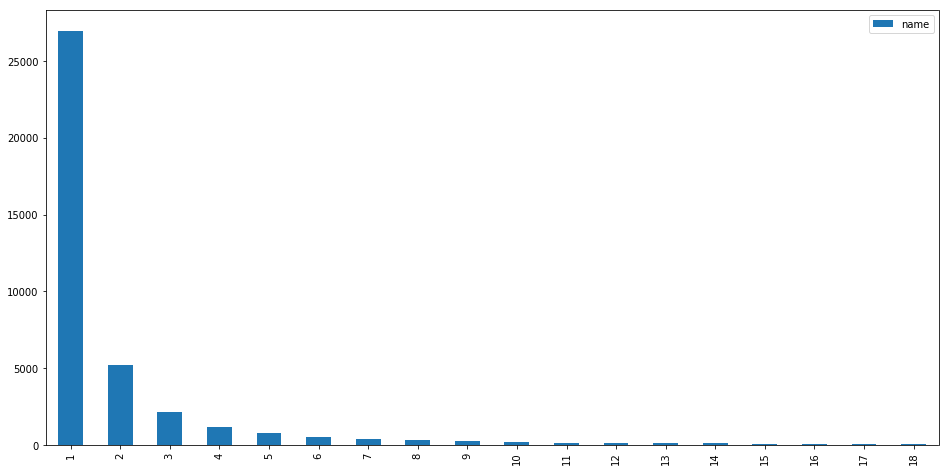

In [16]:
# number of reviews per reviewer
df.groupby('reviewer').count().name.value_counts().to_frame().query('name>50').sort_index().plot.bar(figsize=(16,8))

## Overall review scores

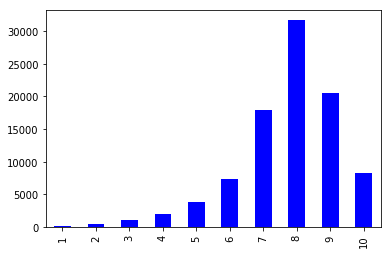

In [20]:
# Cijfer distributie
df.rating.astype(int).value_counts().sort_index().plot.bar(color='b')

## Reviewer that use specific word

In [21]:
import re

In [87]:
word = 'slecht'
df[word] = (
    df
    .apply(lambda x: sum(1 for match in re.finditer(r"\b"+re.escape(word)+r"\b" , x.comment)), axis='columns')
)

In [24]:
def search_for_word(word, df, minimum_number_of_occurences=1):
    df = df.copy()
    df[word] = df.apply(lambda x: sum(1 for match in re.finditer(r"\b"+re.escape(word)+r"\b" , x.comment)), axis='columns')
    df_word = df[df[word] >= minimum_number_of_occurences]
    print(f'Total reviews with {minimum_number_of_occurences} times the word {word}:', len(df_word), f'\nTotal review overall: {len(df)}')
    df_word.rating.astype(int).value_counts().sort_index().plot.bar(color='b')

Total reviews with 1 times the word slecht: 2585 
Total review overall: 93541


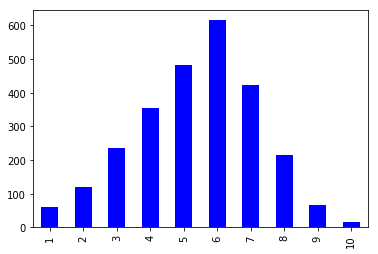

In [25]:
search_for_word('slecht', df, minimum_number_of_occurences=1)

Total reviews with 2 times the word slecht: 226 
Total review overall: 93541


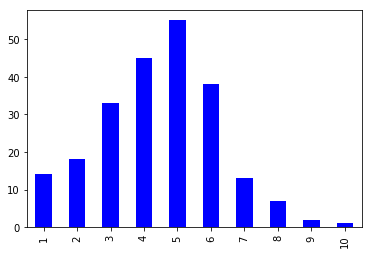

In [26]:
search_for_word('slecht', df, minimum_number_of_occurences=2)

Total reviews with 3 times the word slecht: 30 
Total review overall: 93541


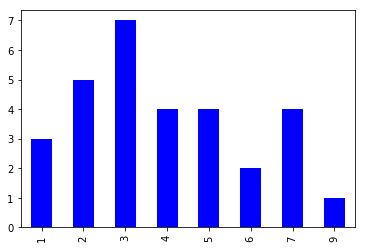

In [27]:
search_for_word('slecht', df, minimum_number_of_occurences=3)

Total reviews with 1 times the word top: 6495 
Total review overall: 93541


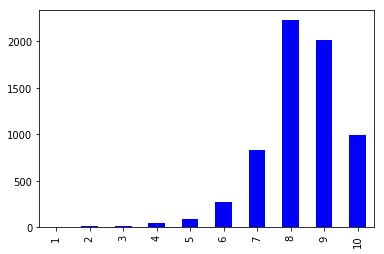

In [28]:
search_for_word('top', df)

## More use of the word 'lekker' does not increase score

Total reviews with 1 times the word lekker: 27838 
Total review overall: 93541


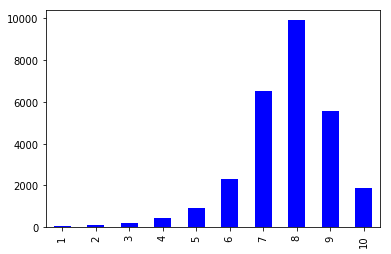

In [29]:
search_for_word('lekker', df)

Total reviews with 2 times the word lekker: 5729 
Total review overall: 93541


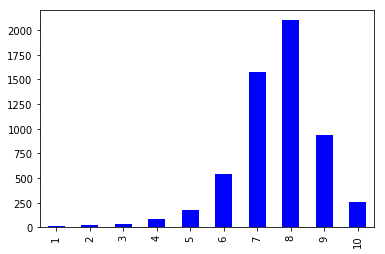

In [30]:
search_for_word('lekker', df, minimum_number_of_occurences=2)

Total reviews with 3 times the word lekker: 1269 
Total review overall: 93541


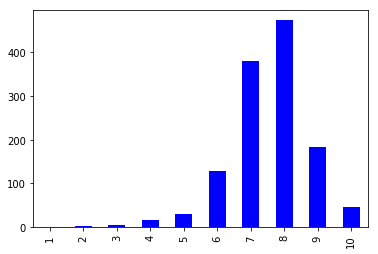

In [31]:
search_for_word('lekker', df, minimum_number_of_occurences=3)

## Average ratings per reviewer

In [88]:
df_mean_count_rating = df.groupby('reviewer').agg({'rating': ['mean', 'count']})

In [91]:
df_mean_count_rating

rating      
                        mean count
reviewer                          
- -.                6.000000     1
--cc .              6.500000     1
-A .               10.000000     1
-Charlotte- .       9.000000     1
-Marianne- .        5.800000     1
-Natalie .          9.500000     2
-PM- .              8.000000     1
-RAWIT- .           8.500000     1
-Vincent- .         7.300000     1
-_ .                7.500000     1
-rina .             9.500000     1
-xxx- .             9.000000     1
.                   8.279085   306
.. FATCAT ..        7.750000     2
0-0-0-0 .           5.000000     1
0001hans .          5.800000     1
0017 .              8.300000     1
0031nederweert .    8.500000     1
00Maxime00 .        7.650000     2
013foodie .         7.000000     2
020adam .           7.900000     2
020louise .         6.650000     2
020proefeter .     10.000000     1
023eten .           8.500000     1
03021975 .          5.800000     1
030603 .            8.300000     1
07Daan .            9.300000     1
08034442 .          9.500000     1
08082008 .          8.500000     1
08671399 .          8.300000     1
...                      ...   ...
zmeddy .            8.000000     1
zondermeer .        6.957143     7
zoninmijnhartje .   9.000000     1
zonnebloem50 .      9.000000     1
zonnigezon .        8.800000     1
zorana.vos .        7.500000     1
zorrro077 .         6.000000     1
zorry_11 .          5.000000     1
zowhiie .           9.000000     1
zowi .              8.800000     1
zsazsa1 .          10.000000     1
zsiedenburg .       8.000000     1
zuideter .          5.800000     1
zula .              8.500000     1
zuly .              8.000000     1
zusters1 .          8.800000     1
zwaagstra .         8.500000     1
zwaakm .            8.433333     3
zwaancp .           7.500000     2
zwemzebra .         7.300000     1
zwijntje .          7.800000     1
zwolsman .          8.500000     1
Àlex L.            10.000000     1
Çi?dem Ö.          10.000000     1
Ömer K.            10.000000     1
Ümit D.            10.000000     1
Ünsal Y.           10.000000     1
ángelique V.        7.000000     1
Ιωάννης Κ.         10.000000     1
沐风 林.              10.000000     2

[39304 rows x 2 columns]

In [33]:
# Reviewers die alleen onvoldoendes geven
df_mean_count_rating[df_mean_count_rating[('rating', 'mean')] < 5.5].shape

(2273, 2)

In [34]:
# Reviewers die alleen onvoldoendes geven (en meer dan 1 rating hebben gegeven)
df_mean_count_rating[(df_mean_count_rating[('rating', 'count')] > 1) & (df_mean_count_rating[('rating', 'mean')] < 5.5)].shape

(193, 2)

## Reviewer with most reviews

In [35]:
df_review_cnt = df.groupby('reviewer').count()
top_reviewer = df_review_cnt[df_review_cnt.name == df_review_cnt.name.max()].index[0]
top_reviewer

'Peter S.'

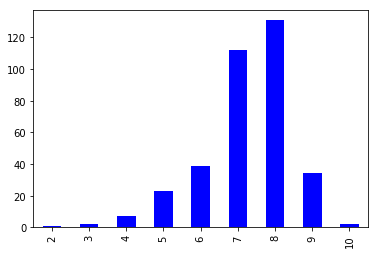

In [36]:
# Wat voor scores geeft deze reviewer
df[df.reviewer == top_reviewer].rating.astype(int).value_counts().sort_index().plot.bar(color='b')

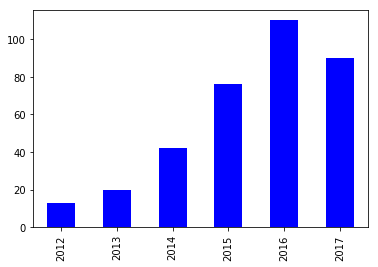

In [37]:
# In welke jaren gaf hij zijn reviews
df[df.reviewer == top_reviewer].date.dt.year.value_counts().sort_index().plot.bar(color='b')

# Reviews over time

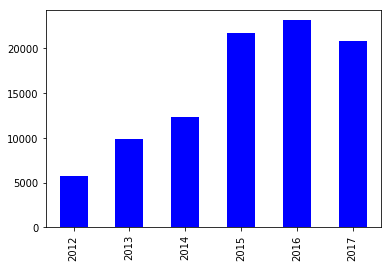

In [40]:
# totaal aantal reviews per jaar
df.date.dt.year.value_counts().sort_index().plot.bar(color='b')

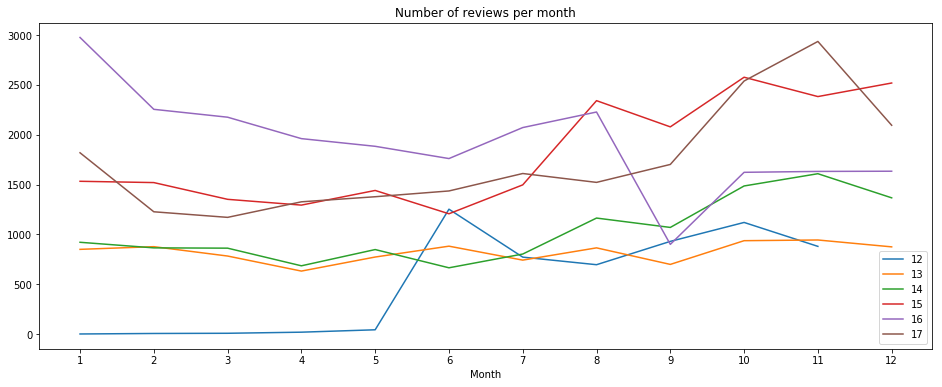

In [38]:
fig, ax = plt.subplots(1,1)

for name, grp in (
    df
    .assign(nr_reviews=1)
    .groupby(['year', 'month'])
    .agg({'nr_reviews' : sum})
    .groupby('year')
):
    grp.nr_reviews.plot(figsize=(16,6), title='Number of reviews per month', label=name, ax=ax) 

ax.set_xlabel('Month')
ax.set_xticks(range(12))
ax.set_xticklabels(range(1,13))
ax.legend()

# Average rating over time: rating increases over time!

In [98]:
list(df.groupby(['year', 'month']))

[(('12', '02'),
                              name  reserved_online      id  rating_service  \
  72473  YamYam Trattoria Pizzeria            False  220297               8   
  
              date  rating_food  rating_decor     reviewer  rating  \
  72473 2012-02-16            9             8  wildzwijn .     8.5   
  
                                                   comment yearmonth year month  \
  72473  De Tartufata is hemelbestormend lekker. Wie ee...   2012-02   12    02   
  
         days_ago  freshness  slecht  
  72473      2189   0.130019       0  ),
 (('12', '03'),
                            name  reserved_online      id  rating_service  \
  3119        Restaurant Jaspers            False  246561               9   
  5541   Brasserie FLO Amsterdam            False  237941               8   
  8596             Le Restaurant            False  240653               9   
  20564                     Bojo            False  219885               7   
  55573             Bistrot Ne

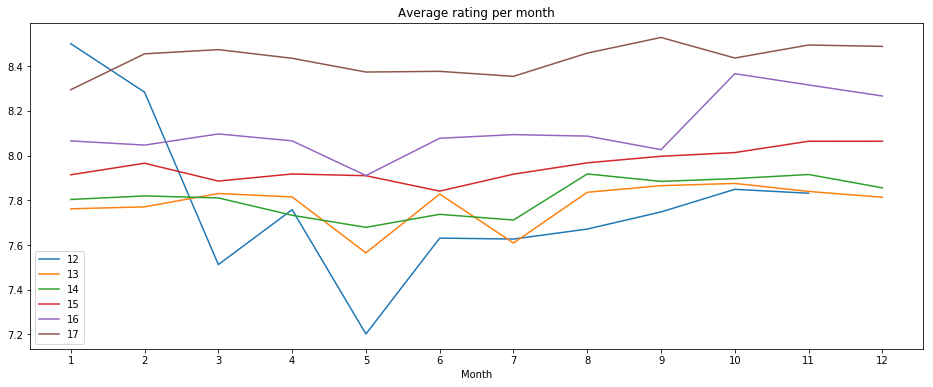

In [39]:
fig, ax = plt.subplots(1,1)

for name, grp in (
    df
    .groupby(['year', 'month'])
    .agg({'rating' : np.mean})
    .groupby('year')
):
    grp.rating.plot(figsize=(16,6), title='Average rating per month', label=name, ax=ax) 

ax.set_xlabel('Month')
ax.set_xticks(range(12))
ax.set_xticklabels(range(1,13))
ax.legend()

# Plot on map

In [45]:
import collections
Coords = collections.namedtuple('Coordinates', 'lat lon')
coords_gdd = Coords(lat=52.352379, lon=4.912933)

In [46]:
import geopy.distance
import folium
from folium.features import DivIcon

In [51]:
def plot_map(df, coords_center, range_in_km=1, min_rating=8, zoom_start=15):
    m = folium.Map(location=list(coords_center), zoom_start=zoom_start)

    for lat, lon, rating in zip(df.info_lat, df.info_lon, df.reviews_rating):
        if rating != -1 and rating >= min_rating and geopy.distance.vincenty(coords_center, (lat,lon)).km < range_in_km:
            folium.map.Marker([lat, lon], icon=DivIcon(
                html=f'<div style="font-size: 15pt; display: inline-block; background-color: white; border-width: thin; border-style: solid; border-color:#5DBCD2">{rating}</div>')
                             ).add_to(m)

    folium.map.Marker(
        list(coords_center),
        icon=DivIcon(
            html='<div style="font-size: 15pt; display: inline-block; background-color:#5DBCD2; color:white; border-width: thin; border-style: solid; border-color:#5DBCD2"> GDD </div>',
            )
        ).add_to(m)
    return m

In [99]:
plot_map(df_res, coords_gdd, range_in_km=1, min_rating=9)

## Average price distribution

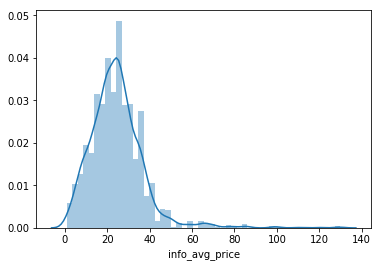

In [53]:
sns.distplot(df_res.query('info_avg_price != -1')['info_avg_price'])

### freshness of score

In [54]:
df['days_ago'] =  (pd.datetime.today() - df['date']).dt.days

In [55]:
df['freshness'] = 1 / np.log(df['days_ago'])

In [56]:
def rating_weigthed_freshness(s):
    return np.average(df.loc[s.index]['rating'], weights=df.loc[s.index]['freshness'])

In [57]:
df.groupby('name').agg(rating_weigthed_freshness)

,reserved_online,id,rating_service,date,rating_food,rating_decor,reviewer,rating,comment,yearmonth,year,month,days_ago,freshness
name,,,,,,,,,,,,,,
Yoghurt Barn Amsterdam,7.182086,7.182086,7.182086,7.182086,7.182086,7.182086,7.182086,7.182086,7.182086,7.182086,7.182086,7.182086,7.182086,7.182086
&moshik,8.493661,8.493661,8.493661,8.493661,8.493661,8.493661,8.493661,8.493661,8.493661,8.493661,8.493661,8.493661,8.493661,8.493661
'cause BEER loves FOOD,8.041687,8.041687,8.041687,8.041687,8.041687,8.041687,8.041687,8.041687,8.041687,8.041687,8.041687,8.041687,8.041687,8.041687
't Blaauwhooft,7.848718,7.848718,7.848718,7.848718,7.848718,7.848718,7.848718,7.848718,7.848718,7.848718,7.848718,7.848718,7.848718,7.848718
't Gasthuys,7.258894,7.258894,7.258894,7.258894,7.258894,7.258894,7.258894,7.258894,7.258894,7.258894,7.258894,7.258894,7.258894,7.258894
't Houtskooltje,7.619630,7.619630,7.619630,7.619630,7.619630,7.619630,7.619630,7.619630,7.619630,7.619630,7.619630,7.619630,7.619630,7.619630
't Kalfje,8.005659,8.005659,8.005659,8.005659,8.005659,8.005659,8.005659,8.005659,8.005659,8.005659,8.005659,8.005659,8.005659,8.005659
't Kuyltje,8.971878,8.971878,8.971878,8.971878,8.971878,8.971878,8.971878,8.971878,8.971878,8.971878,8.971878,8.971878,8.971878,8.971878
't Markerhuisje,8.326365,8.326365,8.326365,8.326365,8.326365,8.326365,8.326365,8.326365,8.326365,8.326365,8.326365,8.326365,8.326365,8.326365


In [58]:
df.groupby('name')['rating'].agg('mean')

name
 Yoghurt Barn Amsterdam            7.215789
&moshik                            8.468508
'cause BEER loves FOOD             8.075000
't Blaauwhooft                     7.905556
't Gasthuys                        7.280000
't Houtskooltje                    7.683333
't Kalfje                          8.000000
't Kuyltje                         8.960000
't Markerhuisje                    8.315686
't Molenpad                        8.118182
't Nieuwe Kafé                     6.966667
't Oostpoortje                     7.392857
't Paardje                         6.592857
't Sluisje                         8.388889
't Steakhouse                      7.711204
't Tuinfeest                       6.450000
't Vliegertje                      8.354148
't Wethoudertje                    8.182609
't Zwaantje                        6.793333
5&33                               7.755696
63graden Foodbar                   9.280769
??Mangiancora                      8.350000
@7                         